In [69]:
!import kaggle

/bin/bash: line 1: import: command not found


In [70]:
!import kaggle download -d datasets/shariful07/student-mental-health

/bin/bash: line 1: import: command not found


In [71]:
!kaggle datasets download -d datasets/shariful07/student-mental-health

403 - Forbidden - Permission 'datasets.get' was denied


In [72]:
!pip install kaggle

In [73]:
!kaggle datasets download -d shariful07/student-mental-health

Dataset URL: https://www.kaggle.com/datasets/shariful07/student-mental-health
License(s): CC0-1.0
student-mental-health.zip: Skipping, found more recently modified local copy (use --force to force download)


In [74]:
!unzip student-mental-health.zip

Archive:  student-mental-health.zip
replace Student Mental health.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Student Mental health.csv  


In [75]:
import pandas as np

df = np.read_csv('Student Mental health.csv')

In [76]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
#df['What is your CGPA?'].unique()
df['What is your CGPA?'].replace({'3.50 - 4.00 ':'3.50 - 4.00'}, inplace=True)
#sns.histplot(df['What is your CGPA?'])

Text(0.5, 0, 'CGPA')

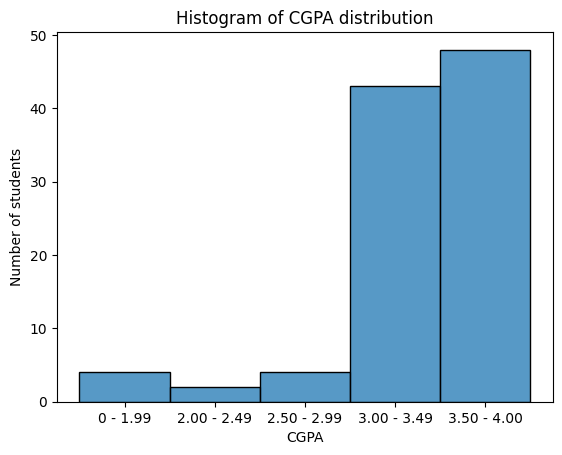

In [78]:
df_ordered = df.sort_values('What is your CGPA?')
sns.histplot(df_ordered['What is your CGPA?'])
plt.title('Histogram of CGPA distribution')
plt.ylabel('Number of students')
plt.xlabel('CGPA')

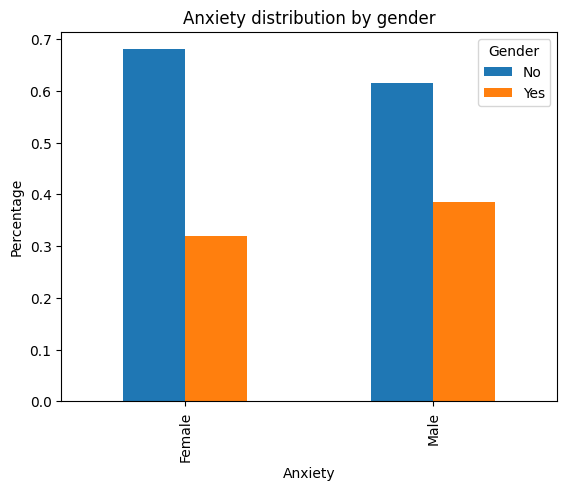

In [79]:
# anxiety_per_gender = df.groupby(df['Choose your gender'])['Do you have Anxiety?'].value_counts(normalize=True).unstack()
# anxiety_per_gender = anxiety_per_gender.reset_index(inplace=True)
# print(anxiety_per_gender)
#sns.barplot(x='Do you have Anxiety?', y='Choose your gender', data=anxiety_per_gender)

#I wasn't getting the plot with seaborn or plt since I didn't understand the process of manipulating the data and then working with it to make a bar graph.
anxiety_prop = df.groupby('Choose your gender')['Do you have Anxiety?'].value_counts(normalize=True).unstack()
anxiety_prop.plot(kind='bar')
plt.title('Anxiety distribution by gender')
plt.xlabel('Anxiety')
plt.ylabel('Percentage')
plt.legend(title='Gender',bbox_to_anchor=(1, 1), loc='upper right')



In [94]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Do you have Panic attack?'].replace({'Yes':1, 'No':0}, inplace=True)
df['Age'] = df['Age'].astype(int)
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,1,No
1,8/7/2020 12:04,Male,21,Islamic education,year 2,3.00 - 3.49,No,No,Yes,0,No
2,8/7/2020 12:05,Male,19,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,1,No
3,8/7/2020 12:06,Female,22,Laws,year 3,3.00 - 3.49,Yes,Yes,No,0,No
4,8/7/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,No,No,No,0,No


<Axes: xlabel='Age', ylabel='Do you have Panic attack?'>

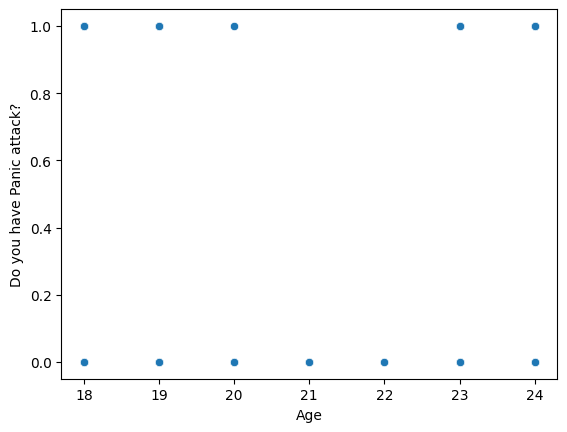

In [93]:
sns.scatterplot(x='Age',y='Do you have Panic attack?', data=df)

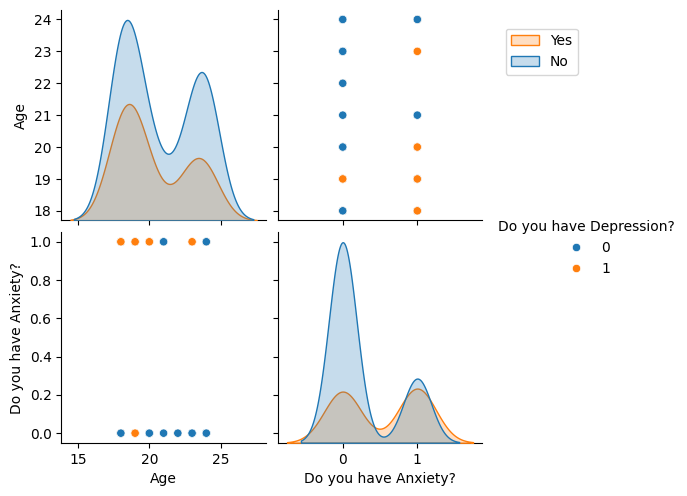

In [102]:
#Normalizing the responses into 0 or 1 and creating a subset from the main dataframe
df['Do you have Anxiety?'].replace({'Yes':1, 'No':0}, inplace=True)
df['Do you have Depression?'].replace({'Yes':1, 'No':0}, inplace=True)
df_subset=df[['Age','Do you have Anxiety?','Do you have Depression?','What is your CGPA?']]

sns.pairplot(df_subset, hue='Do you have Depression?')
plt.legend(bbox_to_anchor=(1.5,2), loc='upper right', labels=['Yes', 'No'])

In [107]:
#Converting the CGPA into categories instead of string values
df['What is your CGPA?'].unique()
df_subset['What is your CGPA?'].replace({'0 - 1.99':1,'2.00 - 2.49':2,'2.50 - 2.99':3,'3.00 - 3.49':4,'3.50 - 4.00':5}, inplace=True)



<ipython-input-107-2e0f2845c453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['What is your CGPA?'].replace({'0 - 1.99':1,'2.00 - 2.49':2,'2.50 - 2.99':3,'3.00 - 3.49':4,'3.50 - 4.00':5}, inplace=True)


,Age,Do you have Anxiety?,Do you have Depression?,What is your CGPA?
Age,1.000000,-0.091890,-0.070418,0.009886
Do you have Anxiety?,-0.091890,1.000000,0.273764,0.169784
Do you have Depression?,-0.070418,0.273764,1.000000,0.006612
What is your CGPA?,0.009886,0.169784,0.006612,1.000000


Text(0.5, 1.0, 'Correlation matrix heatmap')

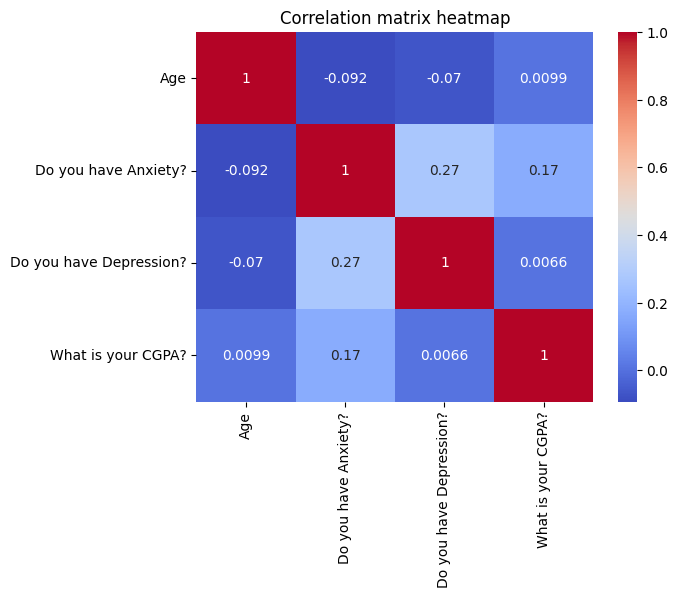

In [108]:
corr_matrix=df_subset.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')

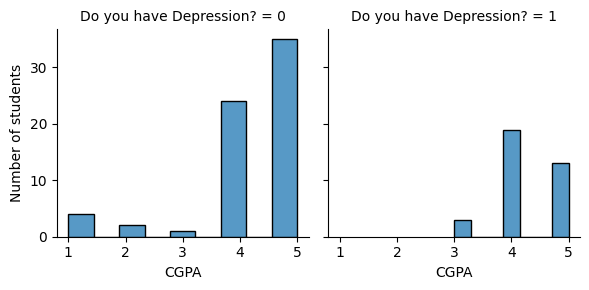

In [142]:
g=sns.FacetGrid(data=df_subset,col='Do you have Depression?')

g.map(sns.histplot, 'What is your CGPA?')
g.set_axis_labels('CGPA')
#g.set_titles('Histogram of CGPA distribution segmented by Depression',y=1.7)
g.set_ylabels('Number of students')
